In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns 
sns.set(font_scale=1.5)
%matplotlib inline

In [2]:
idx = 0
cvfname = ['profileID', 'R-3.6.0-profileID']
root = './data/savedata/' + cvfname[idx] + '/'
namelist = os.listdir(root)
pkglist = [i for i in namelist if '.' not in i]
mdllist = [i for i in os.listdir(os.path.join(root, pkglist[1],'model')) 
           if ('.' not in i) and (i != 'baseline')]
path = root + '%s/model/%s/lr0.0001bs300decay0.0001epoch1000/%d'

In [3]:
df = pd.DataFrame(columns={'pkgname', 'model', 'ID', 'accuracy'})

for pkg in pkglist:
    for mdl in mdllist:
        for idx in range(1,7):
            tpath = path % (pkg, mdl, idx)
            outfile = os.path.join(tpath, 'acc.csv')
            val = pd.read_csv(outfile).iloc[:,-1].values
            df = df.append(pd.Series({'pkgname':pkg,
                                      'model':mdl,
                                      'ID':idx,
                                      'accuracy':float(val)}), 
                           ignore_index=True)
df['accuracy'] = df['accuracy'] * 100

In [4]:
# append the baseline
mdllist = ['baseline_0', 'L1reg_linear_all',
            'unreg_linear_1', 'unreg_linear_2', 'unsup_BIC_1']
path = root + '%s/model/baseline/%d/randomTrainOrderings/1/models/%s'

for pkg in pkglist:
    for mdl in mdllist:
        for idx in range(1, 7):
            tpath = path % (pkg, idx, mdl)
            outfile = os.path.join(tpath, 'accuracy.csv')
            val = pd.read_csv(outfile).iloc[-1,-1]
            df = df.append(pd.Series({'pkgname':pkg,
                                      'model':mdl,
                                      'ID':idx,
                                      'accuracy':float(val)}), 
                           ignore_index=True)

In [5]:
path = './mem/%s/%d_record.csv'
for pkg in pkglist:
    for idx in range(1, 7):
            subpath = path % (pkg, idx)
            red_df = pd.read_csv(subpath)
            df = df.append(pd.Series({'pkgname':pkg,
                                      'model':'conv-squarehinge-100',
                                      'ID':red_df['i_set'][0],
                                      'accuracy':red_df['test_acc'].max()}),
                           ignore_index=True)

In [6]:
path = './mem-1000pre/detailed-1000pre/%d_record.csv'
for idx in range(1, 7):
    subpath = path % (idx)
    red_df = pd.read_csv(subpath)
    df = df.append(pd.Series({'pkgname':'detailed',
                              'model':'conv-squarehinge-1000',
                              'ID':red_df['i_set'][0],
                              'accuracy':red_df['test_acc'].max()}),
                   ignore_index=True)

In [7]:
# modify this later
path = './mem-1000pre/systemic-1000pre/%d_record.csv'
for idx in range(1, 7):
    subpath = path % (idx)
    #red_df = pd.read_csv(subpath)
    df = df.append(pd.Series({'pkgname':'systemic',
                              'model':'conv-squarehinge-1000',
                              'ID':idx,
                              'accuracy':np.nan}),
                   ignore_index=True)

In [8]:
interval_1000d = [0.9749164, 0.9432739, 0.9492868, 0.933539, 0.959083, 0.9516129]
for idx in range(1, 7):
    df = df.append(pd.Series({'pkgname':'detailed',
                              'model':'unreg_linear-1000',
                              'ID':idx,
                              'accuracy':interval_1000d[idx-1]*100}),
                   ignore_index=True)
    
interval_1000s = []
for idx in range(1, 7):
    df = df.append(pd.Series({'pkgname':'systemic',
                              'model':'unreg_linear-1000',
                              'ID':idx,
                              'accuracy':np.nan}),
                   ignore_index=True)

In [9]:
interval_100d = [0.9364548, 0.9043760, 0.9096672, 0.887171, 0.9345336, 0.9338710]
for idx in range(1, 7):
    df = df.append(pd.Series({'pkgname':'detailed',
                              'model':'unreg_linear-100',
                              'ID':idx,
                              'accuracy':interval_100d[idx-1] * 100}),
                   ignore_index=True)
    
interval_100s = []
for idx in range(1, 7):
    df = df.append(pd.Series({'pkgname':'systemic',
                              'model':'unreg_linear-100',
                              'ID':idx,
                              'accuracy':np.nan}),
                   ignore_index=True)

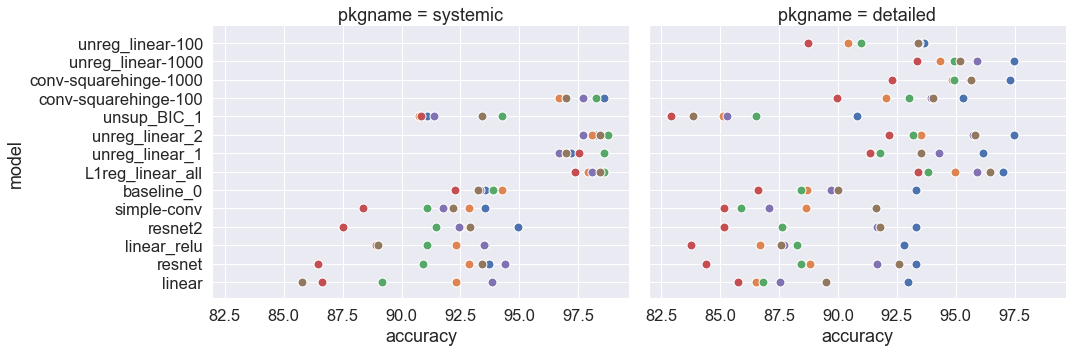

In [10]:
g = sns.FacetGrid(df,  col="pkgname", hue='ID',height=5, aspect=1.5)
g = g.map(plt.scatter, "accuracy", "model", edgecolor="w", s=80)
g.savefig("./Figs/accuracy_cmp4.pdf")